In [1]:
import os 
import pandas as pd
import numpy as np 
import sqlalchemy as sql 
import matplotlib.pyplot as plt 

## Create engine to connect to database

In [2]:
from config import db_uri
engine = sql.create_engine(db_uri)

## Verifying sheet names in excel book

In [3]:
filename = 'data.xlsx'
book = pd.ExcelFile(filename)
book.sheet_names

['Product Sales',
 'Sheet1',
 'Employees',
 'Sales Periods',
 'Items Offered',
 'Toy_PowerBI_Example',
 'Product Price Change',
 'Product Details',
 'capstone_tables_part1',
 'capstone_table_part2']

## Create Sales by Regions

### Obtain employees table data

In [4]:
employees_df = book.parse('Employees')
employees_df

,Sales Team Lead,PayGrade,Region,EMP_ID
0,"Evans, Gina",C12,NW,EMP244
1,"Lawson, Harry",C11,NW,EMP256
2,"Bachmann, Jane",C13,NW,EMP234
3,"Clement, Beverly",C14,SW,EMP267
4,"Allen, Maude",C12,SW,EMP290


### Obtain product sales data

In [5]:
product_sales_df = book.parse('Product Sales')
product_sales_df

,Sale ID,Index,ITEM_CODE,EMP_ID,Attribute,Year,Value
0,1,2,PROD_001,EMP244,W00,2019,35
1,2,4,PROD_002,EMP244,W00,2019,41
2,3,6,PROD_003,EMP267,W00,2019,21
3,4,8,PROD_001,EMP267,W00,2019,32
4,5,10,PROD_004,EMP267,W00,2019,37
...,...,...,...,...,...,...,...
8315,8316,152,ESP_008,EMP234,W09,2020,1
8316,8317,154,ESP_008,EMP244,W09,2020,5
8317,8318,156,ESP_008,EMP256,W09,2020,0
8318,8319,158,ESP_008,EMP267,W09,2020,10


In [6]:
sales_employees_df = pd.merge(employees_df, product_sales_df, how='left', on=['EMP_ID'])
sales_employees_df

,Sales Team Lead,PayGrade,Region,EMP_ID,Sale ID,Index,ITEM_CODE,Attribute,Year,Value
0,"Evans, Gina",C12,NW,EMP244,1,2,PROD_001,W00,2019,35
1,"Evans, Gina",C12,NW,EMP244,2,4,PROD_002,W00,2019,41
2,"Evans, Gina",C12,NW,EMP244,8,16,PROD_003,W00,2019,27
3,"Evans, Gina",C12,NW,EMP244,10,20,PROD_004,W00,2019,43
4,"Evans, Gina",C12,NW,EMP244,13,26,PROD_005,W00,2019,40
...,...,...,...,...,...,...,...,...,...,...
8315,"Allen, Maude",C12,SW,EMP290,8300,120,ESP_004,W09,2020,0
8316,"Allen, Maude",C12,SW,EMP290,8305,130,ESP_005,W09,2020,1
8317,"Allen, Maude",C12,SW,EMP290,8310,140,ESP_006,W09,2020,2
8318,"Allen, Maude",C12,SW,EMP290,8315,150,ESP_007,W09,2020,0


### Group by Regions and Graphy to Validate

In [7]:
sales_by_region = pd.DataFrame(sales_employees_df, columns = ['Region', 'Value'])
sales_by_region

,Region,Value
0,NW,35
1,NW,41
2,NW,27
3,NW,43
4,NW,40
...,...,...
8315,SW,0
8316,SW,1
8317,SW,2
8318,SW,0


In [8]:
# sales_by_region.plot.bar(title = 'Sales by Region', xlabel = 'Region', ylabel='Sales Total')

## Create sales by salesperson

### Create table with employee ID, Region and value with added column as Employee with Region assigned (to build a storyline)

In [9]:
sales_by_employee = pd.DataFrame(sales_employees_df, columns = ['EMP_ID', 'Region', 'Value'])
sales_by_employee['Employee'] = sales_employees_df['EMP_ID'] + ' ' + sales_employees_df['Region']
sales_by_employee

,EMP_ID,Region,Value,Employee
0,EMP244,NW,35,EMP244 NW
1,EMP244,NW,41,EMP244 NW
2,EMP244,NW,27,EMP244 NW
3,EMP244,NW,43,EMP244 NW
4,EMP244,NW,40,EMP244 NW
...,...,...,...,...
8315,EMP290,SW,0,EMP290 SW
8316,EMP290,SW,1,EMP290 SW
8317,EMP290,SW,2,EMP290 SW
8318,EMP290,SW,0,EMP290 SW


### Obtain the total value of sales per 'Employee' column and chart to validate

<AxesSubplot:title={'center':'Sales by Employee'}, xlabel='Employee Number', ylabel='Sales Total'>

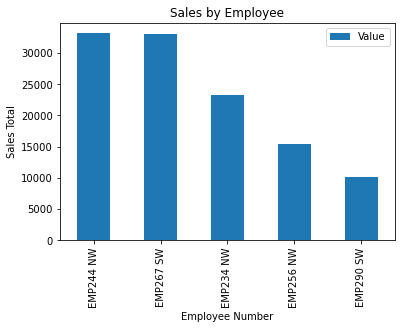

In [10]:
sales_by_employee = sales_by_employee.groupby(['Employee']).sum()
sales_by_employee
sales_by_employee.sort_values(by = 'Value', ascending = False).plot.bar(title = 'Sales by Employee', xlabel = 'Employee Number', ylabel = 'Sales Total')

## Top sales per period per salesperson

### Create Period column

In [11]:
sales_by_period_employee = sales_employees_df
sales_by_period_employee['Period'] = sales_employees_df['Year'].astype(str) + ' ' + sales_employees_df['Attribute']
sales_by_period_employee['Employee'] = sales_by_period_employee['EMP_ID'] + ' ' + sales_by_period_employee['Region']

### Group By Period column

In [22]:
sales_by_period_employee = pd.DataFrame(sales_by_period_employee, columns= ['Period', 'Employee', 'Value'])
emps = sales_by_period_employee.groupby(by = ['Period', 'Employee']).sum()
emps

Value
Period   Employee        
2019 W00 EMP234 NW    221
         EMP244 NW    327
         EMP256 NW    156
         EMP267 SW    274
         EMP290 SW    110
...                   ...
2020 W51 EMP234 NW    221
         EMP244 NW    274
         EMP256 NW    155
         EMP267 SW    216
         EMP290 SW    133

[520 rows x 1 columns]

### Compare if employee's value is the maximum using .transform('max')

In [26]:
emps = emps.reset_index()
emps = emps[emps['Value'] == emps.groupby('Period')['Value'].transform('max')]
emps = emps.sort_values(by = 'Period', ascending = True)
emps

,index,Period,Employee,Value
0,1,2019 W00,EMP244 NW,327
1,6,2019 W01,EMP244 NW,323
2,13,2019 W02,EMP267 SW,358
3,18,2019 W03,EMP267 SW,390
4,21,2019 W04,EMP244 NW,362
...,...,...,...,...
99,498,2020 W47,EMP267 SW,314
100,503,2020 W48,EMP267 SW,297
101,508,2020 W49,EMP267 SW,299
102,511,2020 W50,EMP244 NW,295


## Sales by Category of Items

### Getting Items data

In [24]:
categorized_df = product_sales_df
product_sales_df['Period'] = product_sales_df['Year'].astype(str) + ' ' + product_sales_df['Attribute']
product_sales_df['Category'] = np.where(product_sales_df['ITEM_CODE'].str[0:3] == 'ESP', 'Warranty', 'Product')
categorized_df = pd.DataFrame(product_sales_df, columns = ['Period', 'Category', 'Value'])

### Grouping Values by Category

In [25]:
categories_df = categorized_df.groupby(['Category']).sum()
categories_df

,Value
Category,
Product,99446
Warranty,15603
